In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim

In [249]:
#CNN Network

class Down(nn.Module):
    def __init__(self, in_channels, out_channels, device = "cuda"):
        super().__init__()
        self.device = torch.device(device)
        self.out_channels = out_channels  # Store out_channels as an instance variable
        conv1_out_channels = (out_channels + in_channels) // 2
        
        self.conv1 = nn.Conv2d(in_channels, conv1_out_channels, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(conv1_out_channels, out_channels, kernel_size=3, padding=1)

        # Initialize fc1 later
        self.fc1 = None  # Initialize later based on input size
        self.fc2 = nn.Linear(out_channels, 200)  # Adjust output size if needed
        self.fc3 = nn.Linear(200, 100)
        self.out = nn.Linear(100, 10)  # The input size must match the output of fc2

    def forward(self, t):
        t = F.max_pool2d(t, kernel_size=3, stride=2, padding=1)
        #print(t.shape)
        t = self.conv1(t)
        #print(t.shape)
        t = F.relu(t)
        t = self.conv2(t)
        #print(t.shape)
        t = F.relu(t)

        # Flatten the tensor for fully connected layers
        t = t.view(t.size(0), -1)
        if self.fc1 is None:
            self.fc1 = nn.Linear(t.size(1), self.out_channels).to(self.device)

        # Dynamically set the first linear layer based on the flattened size

        t = self.fc1(t)
        #print(t.shape, "fc1")
        t = F.relu(t)
        t = self.fc2(t)
        #print(t.shape, "fc2")
        t = F.relu(t)
        t = self.fc3(t)
        #print(t.shape, "fc1")
        t = F.relu(t)
        t = self.out(t)
        #print(t.shape, "out")
        return t


In [250]:
# Random data example usage
#network = Down(1, 5).to("cuda")
#real_samples_labels = torch.randint(0, 100, (1, 1, 32, 32), #dtype=torch.float32).to("cuda")
#out = network(real_samples_labels)
##print(out.shape)  # Should output: torch.Size([1, 10])

#plt.imshow(out[:,:].detach().cpu().numpy())  # get the graph

In [251]:
#Download FMNIST data
train_set = torchvision.datasets.FashionMNIST(
    root='./data'
    ,train=True
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ]))

In [252]:
#sample = next(iter(train_set))
#image, label = sample # returns a sample, which can be split in to an image and a label
#plt.imshow(image.squeeze())

In [253]:
##first run test
#train_loader = torch.utils.data.DataLoader(train_set, batch_size=1000, shuffle=True)
#sample = next(iter(train_loader))
#image, label = sample
#print(image.shape)
#print(label)
#
#batch = next(iter(train_loader))
#images, labels = batch
#images, labels = images.to("cuda"), labels.to("cuda")
#network = Down(in_channels=1, out_channels=100).to("cuda")
#preds = network(images)
##print(np.max(preds.detach().numpy(),axis=0))
##print(preds)
##print(labels)

In [254]:
##first fun test
#def get_num_correct(preds, labels):
#    return preds.argmax(dim=1).eq(labels).sum().item()
#
#hold = []
#for I in range(100):
#    batch = next(iter(train_loader))
#    images, labels = batch
#    images, labels = images.to("cuda"), labels.to("cuda")
#    preds = network(images)
#    hold.append(get_num_correct(preds, labels))

In [255]:
#plt.plot(hold)
#print(np.mean(hold))

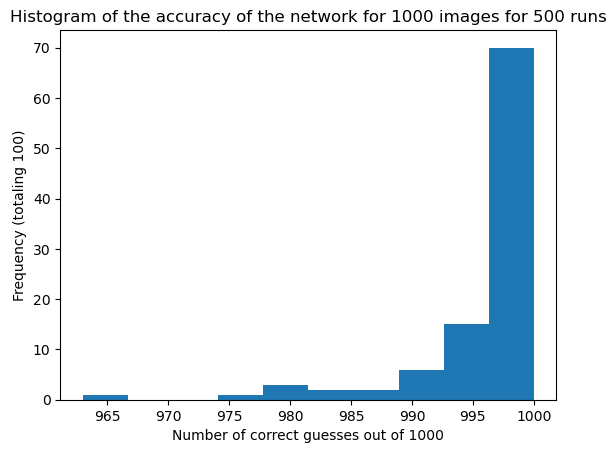

In [278]:
#training on repeat
histogram = []
#
for I in range(100):
    train_loader = torch.utils.data.DataLoader(train_set, batch_size=1000, shuffle=True)
    sample = next(iter(train_loader))
    image, label = sample
    #print(image.shape)
    #print(label)
    
    def get_num_correct(preds, labels):
        return preds.argmax(dim=1).eq(labels).sum().item()
    
    device = torch.device("cuda")
    network = Down(1, 16).to("cuda")
    
    batch = next(iter(train_loader))
    images, labels = batch
    images, labels = images.to(device), labels.to(device)
    
    number_run = 500
    holdall = np.zeros(number_run)
    
    optimizer = optim.Adam(network.parameters(), lr=0.01)#, weight_decay=1e-5)
    
    for I in range(number_run):
        preds = network(images)
        loss = F.cross_entropy(preds, labels)
        holdall[I] = get_num_correct(preds.to('cuda'), labels.to('cuda'))
        loss.backward() # Calculating the gradients
        #optimizer = optim.Adam(network.parameters(), lr=0.001)
        optimizer.step()
        optimizer.zero_grad()

    #plt.plot(holdall)
    #plt.show()
    #print(max(holdall))
    
    histogram.append(max(holdall))

plt.hist(histogram)
plt.xlabel('Number of correct guesses out of 1000')
plt.ylabel('Frequency (totaling 100)')
plt.title("Histogram of the accuracy of the network for 1000 images for 500 runs")
plt.show()

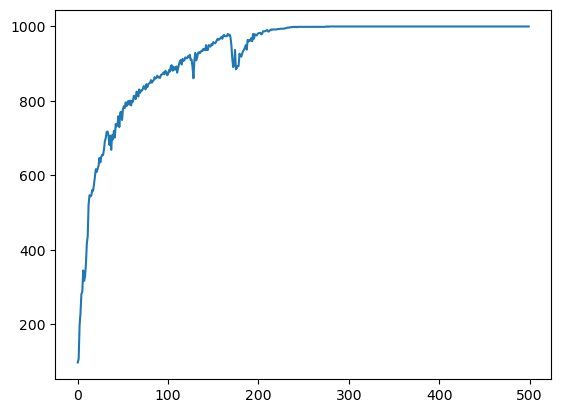

1000.0


In [269]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=1000, shuffle=True)
sample = next(iter(train_loader))
image, label = sample
#print(image.shape)
#print(label)

def get_num_correct(preds, labels):
    return preds.argmax(dim=1).eq(labels).sum().item()

device = torch.device("cuda")
network = Down(1, 16).to("cuda")

batch = next(iter(train_loader))
images, labels = batch
images, labels = images.to(device), labels.to(device)

number_run = 500
holdall = np.zeros(number_run)

optimizer = optim.Adam(network.parameters(), lr=0.01)#, weight_decay=1e-5)

for I in range(number_run):
    preds = network(images)
    loss = F.cross_entropy(preds, labels)
    holdall[I] = get_num_correct(preds.to('cuda'), labels.to('cuda'))
    loss.backward() # Calculating the gradients
    #optimizer = optim.Adam(network.parameters(), lr=0.001)
    optimizer.step()
    optimizer.zero_grad()
plt.plot(holdall)
plt.show()
print(max(holdall))